[0.00000000e+00 1.13381256e-05 2.26762512e-05 ... 4.99977324e-01
 4.99988662e-01 5.00000000e-01]


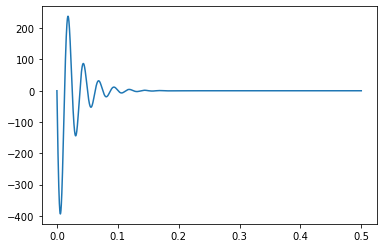

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import wave
import struct

Amax = 1000 #最大振幅
Fs = 44100 #サンプリング周波数
sec = 0.5 #時間

# 金属
# A = -1000 #最大振幅
# B = 30 #減衰率
# w = 2000 #角周波数

# 木
A = -500
B = 40
w = 250

# ゴム
""" A = -1000
B = 40
w = 100 """

Qt = []

step = np.linspace(0,sec,Fs)
print(step)
for t in step:
    qt = A*np.exp(-B*t)*np.sin(w*t)
    Qt.append(qt)

plt.plot(step,Qt)
plt.show()

Qt = [int(step/Amax *32767.0) for step in Qt] #16bit符号付き変数に変換

#バイナリ化
binwave = struct.pack("h"*len(Qt), *Qt)

#減衰正弦波をwavファイルとして書き出し
w = wave.Wave_write(str(A)+"exp(-"+str(B)+"t)sin("+str(w)+"t).wav")
p = (1,2,Fs,len(binwave),'NONE','not compressed')
w.setparams(p)
w.writeframes(binwave)
w.close()

チャンネル数 =  2
サンプル幅 (バイト数) =  2
サンプリングレート(Hz) = 44100
サンプル数 = 44100
録音時間 = 1


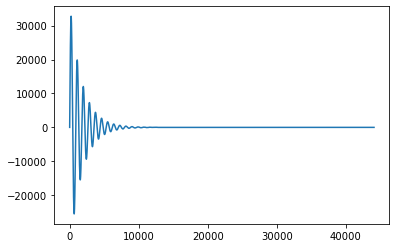

In [21]:
from cmath import exp
import numpy as np
import wave
import struct
from matplotlib import pyplot as plt
 
fname = 'sinwave.wav'
wf = wave.open(fname, 'w')
ch = 2
width = 2
samplerate = 44100
wf.setnchannels(ch)
wf.setsampwidth(width)
wf.setframerate(samplerate)

time = 1
numsamples = time * samplerate

print( u"チャンネル数 = ", ch)
print( u"サンプル幅 (バイト数) = ", width)
print( u"サンプリングレート(Hz) =", samplerate)
print( u"サンプル数 =", numsamples)
print( u"録音時間 =", time)
 
# 信号データを作る (numpy の ndarray で)
Am = 32767
b = 25
freq = 50                      # 周波数 freq を 440 Hz にする
x = np.linspace(0, time, numsamples+1) # 0≦t≦time をnumsamples等分
y = Am * np.exp(-b*x) * np.sin(2 * np.pi * freq * x)       # 周波数 freq (Hz) の正弦波
# y=np.rint(32767*y/max(abs(y)))       # [-32767,32767] の範囲に収める
y=y.astype(np.int16)                 # 16ビット整数に型変換する
y=y[0:numsamples]                    # numsamples 個のデータに打ち切る
 
# ndarray から bytes オブジェクトに変換
plt.plot(y)
data=struct.pack("h" * numsamples , *y)

# データを書き出す
wf.writeframes(data)
wf.close()